<a href="https://colab.research.google.com/github/Kogila2004/MY-LEARNING/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/Housing.csv')
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

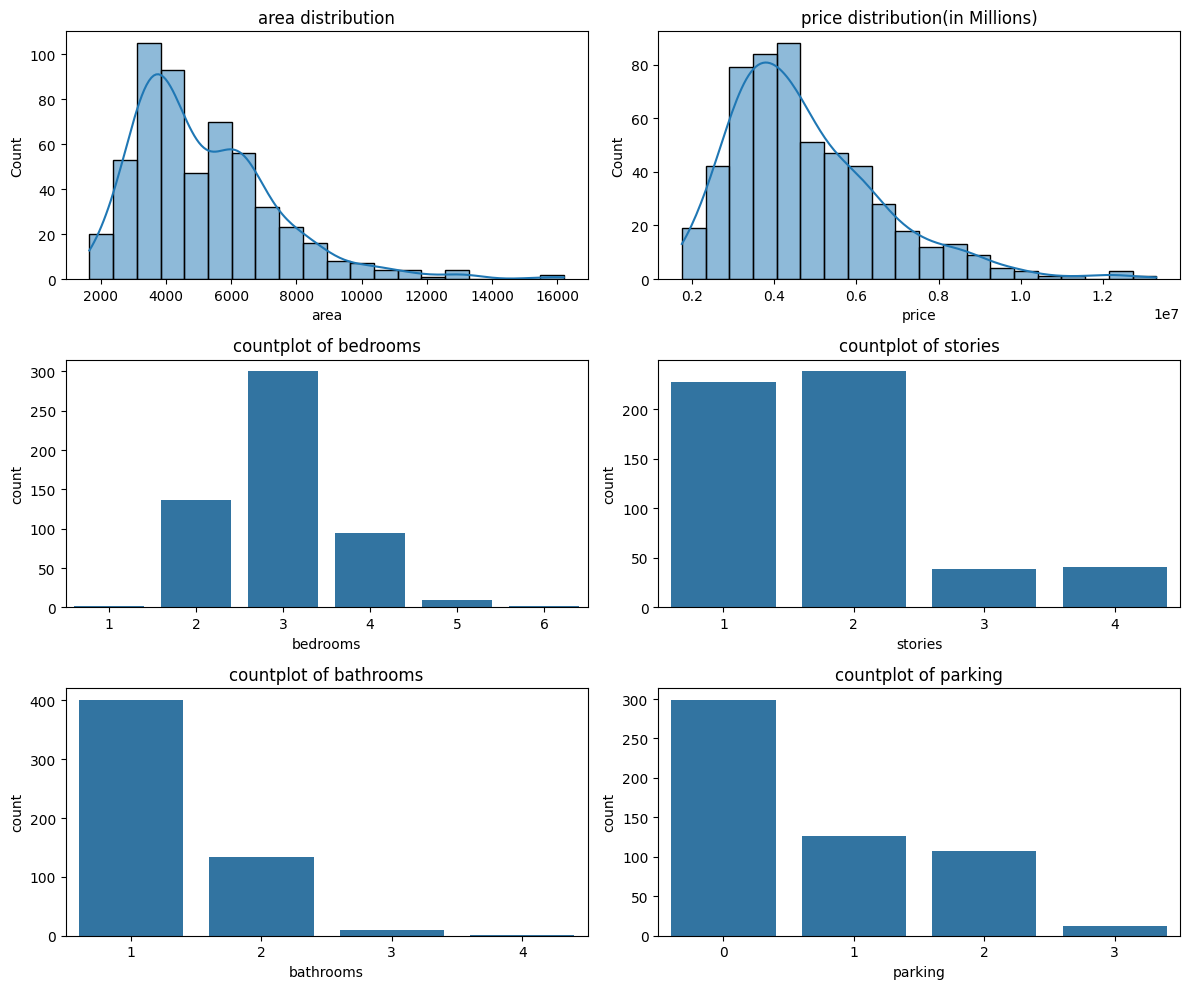

In [5]:
fig,axes = plt.subplots(3,2,figsize=(12,10))

sns.histplot(data=df,x='area',bins = 20,kde = True,ax=axes[0,0])
axes[0,0].set_title('area distribution')
sns.histplot(data=df,x='price',bins = 20,kde = True,ax=axes[0,1])
axes[0,1].set_title('price distribution(in Millions)')
sns.countplot(data=df,x='bedrooms',ax=axes[1,0])
axes[1,0].set_title('countplot of bedrooms')
sns.countplot(data=df,x='stories',ax=axes[1,1])
axes[1,1].set_title('countplot of stories')
sns.countplot(data=df,x='bathrooms',ax=axes[2,0])
axes[2,0].set_title('countplot of bathrooms')
sns.countplot(data=df,x='parking',ax=axes[2,1])
axes[2,1].set_title('countplot of parking')
plt.tight_layout()
plt.show()

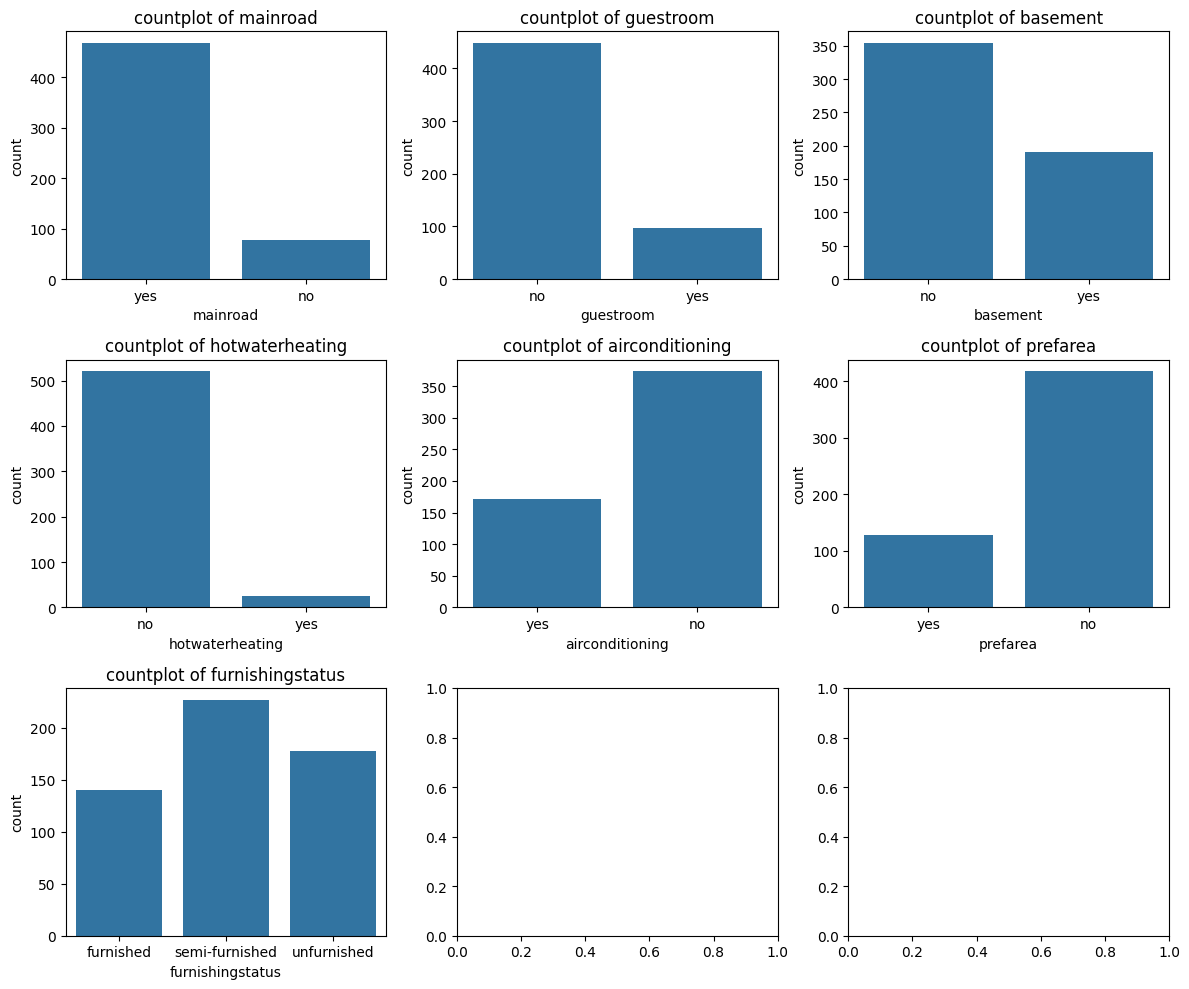

In [6]:
fig,axes = plt.subplots(3,3,figsize=(12,10))

sns.countplot(data=df,x='mainroad',ax=axes[0,0])
axes[0,0].set_title('countplot of mainroad')
sns.countplot(data=df,x='guestroom',ax=axes[0,1])
axes[0,1].set_title('countplot of guestroom')
sns.countplot(data=df,x='basement',ax=axes[0,2])
axes[0,2].set_title('countplot of basement')
sns.countplot(data=df,x='hotwaterheating',ax=axes[1,0])
axes[1,0].set_title('countplot of hotwaterheating')
sns.countplot(data=df,x='airconditioning',ax=axes[1,1])
axes[1,1].set_title('countplot of airconditioning')
sns.countplot(data=df,x='prefarea',ax=axes[1,2])
axes[1,2].set_title('countplot of prefarea')
sns.countplot(data=df,x='furnishingstatus',ax=axes[2,0])
axes[2,0].set_title('countplot of furnishingstatus')

plt.tight_layout()
plt.show()

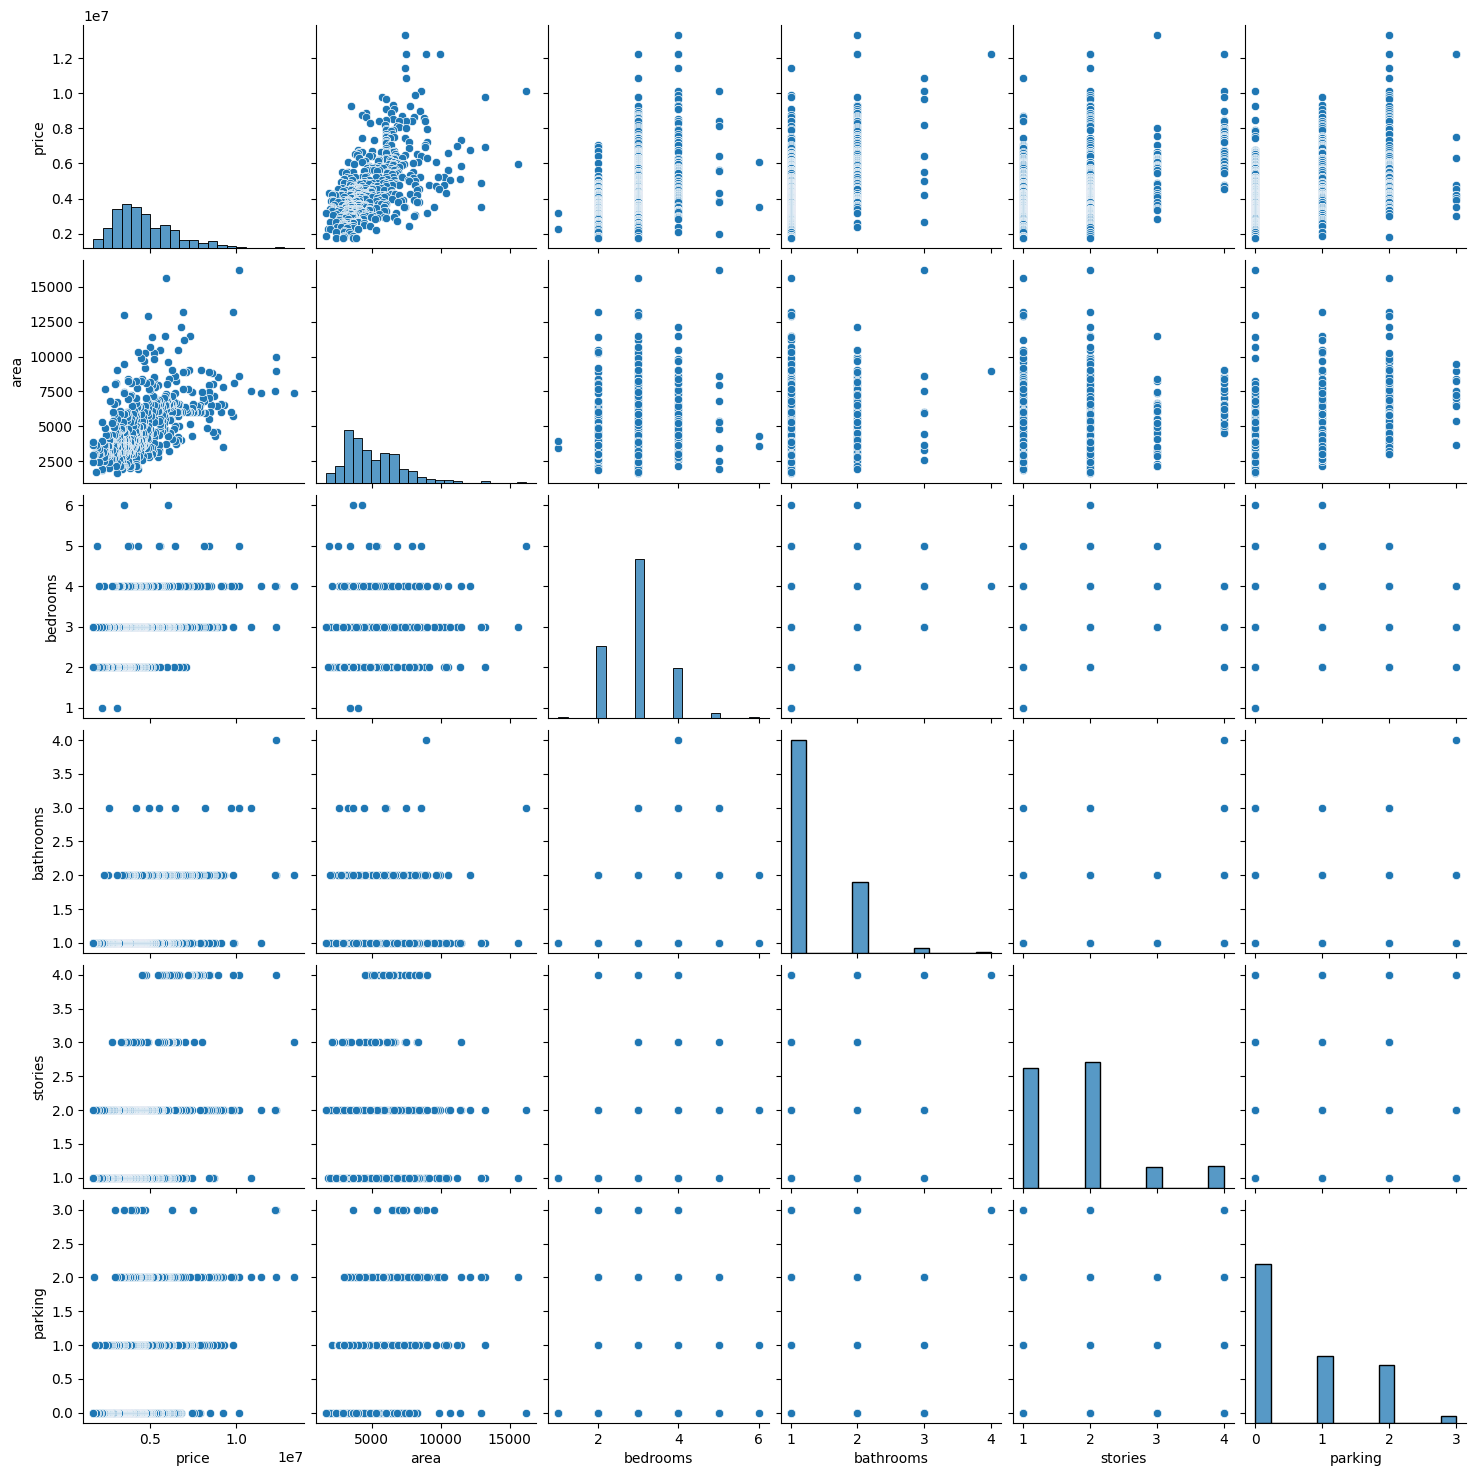

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
le = LabelEncoder()

for col in ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']:
    df[col] = le.fit_transform(df[col])
df['furnishingstatus_mapped'] = df['furnishingstatus'].map({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})
df.drop(columns = ['furnishingstatus'],inplace = True)
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_mapped  
0                        2  
1                        2  
2                        1  
3                        2  
4                        2

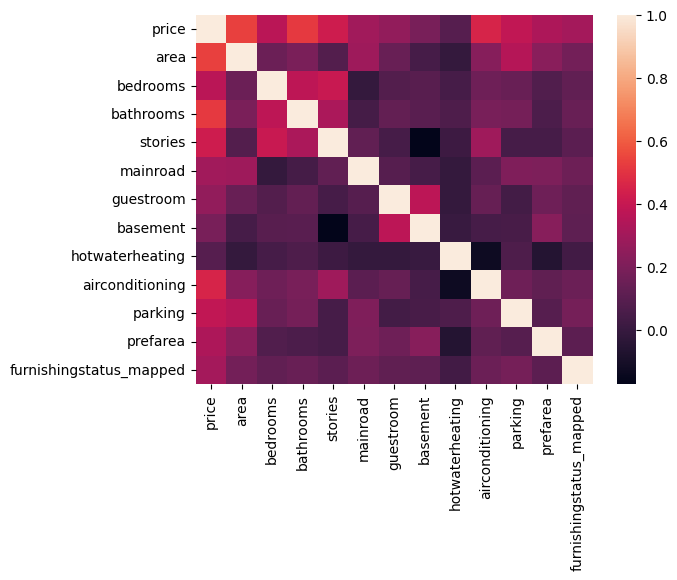

In [9]:
corralations = df.corr()
sns.heatmap(corralations)
plt.show()

In [10]:
corr = df.corr()['price']
print(corr.drop('price'))

area                       0.535997
bedrooms                   0.366494
bathrooms                  0.517545
stories                    0.420712
mainroad                   0.296898
guestroom                  0.255517
basement                   0.187057
hotwaterheating            0.093073
airconditioning            0.452954
parking                    0.384394
prefarea                   0.329777
furnishingstatus_mapped    0.304721
Name: price, dtype: float64


In [11]:
useful_features = corr[abs(corr) >= 0.15].index

print("Selected features:", useful_features.tolist())
df2 = df[useful_features.to_list()]

Selected features: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_mapped']


In [12]:
df2['total_rooms'] = df2['bedrooms'] + df2['bathrooms'] + df2['guestroom']
df2['rooms_per_area'] = df2['total_rooms'] / df2['area']
df2['bath_bed_ratio'] = df2['bathrooms'] / df2['bedrooms']
df2['stories_sq'] = df2['stories'] ** 2
df2['is_luxury'] = ((df2['area'] > df2['area'].median()) & (df2['furnishingstatus_mapped'] == 2)).astype(int)
df2['amenities'] = df2[['airconditioning','basement','parking','mainroad','prefarea']].sum(axis=1)
df2.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  airconditioning  parking  prefarea  furnishingstatus_mapped  \
0         0                1        2         1                        2   
1         0                1        3         0                        2   
2         1                0        2         1                        1   
3         1                1        3         1                        2   
4         1                1        2         0                        2   

   total_rooms  rooms_per_area  bath_bed_ratio  stories_sq  is_luxury  \
0            6        0.000809        0.500000           9          1   
1            8        0.000893        1.000000          16          1   
2            5        0.000502        0.666667           4          0   
3            6        0.000800        0.500000           4          1   
4            6        0.000809        0.250000           4          1   

   amenities  
0          5  
1          5  
2          5  
3          7  
4          5

In [13]:
numeric_features = ['area','price','rooms_per_area']
df2[numeric_features].skew().sort_values(ascending = False)

rooms_per_area    1.377773
area              1.321188
price             1.212239
dtype: float64

In [14]:
df2['area'] = np.log1p(df2['area'])
df2['price'] = np.log1p(df2['price'])
df2['rooms_per_area'] = np.log1p(df2['rooms_per_area'])
df2[numeric_features].skew().sort_values(ascending = False)

rooms_per_area    1.375680
price             0.140863
area              0.133747
dtype: float64

In [15]:
Q1 = df2['rooms_per_area'].quantile(0.25)
Q3 = df2['rooms_per_area'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2 = df2[(df2['rooms_per_area'] >= lower_bound) & (df2['rooms_per_area'] <= upper_bound)]

print("After removing outliers:", df2.shape)

df2[numeric_features].skew().sort_values(ascending = False)

After removing outliers: (520, 18)


rooms_per_area    0.430532
area              0.285652
price             0.125385
dtype: float64

In [16]:
x = df2.drop(['price'],axis = 1)
y = df2['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [17]:
scaler = RobustScaler()
scaled_features = ['area','bedrooms','bathrooms','stories','parking','total_rooms','rooms_per_area','bath_bed_ratio','stories_sq','amenities']
x_train[scaled_features] = scaler.fit_transform(x_train[scaled_features])
x_test[scaled_features] = scaler.transform(x_test[scaled_features])

In [18]:
warnings.filterwarnings("ignore",category=ConvergenceWarning)
models_params = {
    "LinearRegression": (
        LinearRegression(),
        {"fit_intercept": [True, False]}
    ),
    "PolynomialRegression":(
        Pipeline([
        ("poly_features", PolynomialFeatures()),
        ("linear_regression", LinearRegression())
    ]),
    {
        "poly_features__degree": [2, 3],          # quadratic and cubic
        "linear_regression__fit_intercept": [True, False]
    }
    ),
    "Ridge": (
        Ridge(max_iter=5000),
        {"alpha": [0.1, 1, 10, 50]}
    ),
    "Lasso": (
        Lasso(max_iter=5000),
        {"alpha": [0.001, 0.01, 0.1, 1, 10]}
    ),
    "ElasticNet": (
        ElasticNet(max_iter=5000),
        {"alpha": [0.001, 0.01, 0.1, 1], "l1_ratio": [0.2, 0.5, 0.8]}
    ),
    "DecisionTree": (
        DecisionTreeRegressor(random_state=42),
        {"max_depth": [None, 5, 10, 20], "min_samples_split": [2, 5, 10]}
    ),
    "RandomForest": (
        RandomForestRegressor(random_state=42),
        {"n_estimators": [100, 200], "max_depth": [None, 10, 20]}
    ),
    "GradientBoosting": (
        GradientBoostingRegressor(random_state=42),
        {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1], "max_depth": [3, 5]}
    ),
    "SVR": (
        SVR(),
        {"kernel": ["linear", "rbf"], "C": [1, 10, 100], "gamma": ["scale", 0.1, 0.01]}
    ),
    "XGBoost": (
        xgb.XGBRegressor(random_state=42),
        {"n_estimators": [200, 500], "learning_rate": [0.05, 0.1], "max_depth": [3, 5, 7]}
    )
}

results = {}
grids = {}

for name, (model, params) in models_params.items():
    print(f"Training {name}...")
    grid = GridSearchCV(model, params, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
    grid.fit(x_train, y_train)

    results[name] = {
        "best_score": -grid.best_score_,
        "best_params": grid.best_params_
    }
    grids[name] = grid

for model_name, result in results.items():
    print(f"{model_name}: RMSE={result['best_score']:.4f}, Best Params={result['best_params']}")

Training LinearRegression...
Training PolynomialRegression...
Training Ridge...
Training Lasso...
Training ElasticNet...
Training DecisionTree...
Training RandomForest...
Training GradientBoosting...
Training SVR...
Training XGBoost...
LinearRegression: RMSE=0.1960, Best Params={'fit_intercept': True}
PolynomialRegression: RMSE=0.2979, Best Params={'linear_regression__fit_intercept': True, 'poly_features__degree': 2}
Ridge: RMSE=0.1956, Best Params={'alpha': 1}
Lasso: RMSE=0.1964, Best Params={'alpha': 0.001}
ElasticNet: RMSE=0.1958, Best Params={'alpha': 0.001, 'l1_ratio': 0.2}
DecisionTree: RMSE=0.2514, Best Params={'max_depth': 5, 'min_samples_split': 10}
RandomForest: RMSE=0.2163, Best Params={'max_depth': 10, 'n_estimators': 200}
GradientBoosting: RMSE=0.2112, Best Params={'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
SVR: RMSE=0.1956, Best Params={'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
XGBoost: RMSE=0.2136, Best Params={'learning_rate': 0.05, 'max_depth': 3, 

In [19]:
final_results = {}

for name, grid in grids.items():
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    final_results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2,
    }


df_final = pd.DataFrame(final_results).T.sort_values("RMSE")
print(df_final)

                           MAE       MSE      RMSE        R2
LinearRegression      0.182969  0.056258  0.237187  0.679469
Ridge                 0.183401  0.056432  0.237554  0.678478
ElasticNet            0.183584  0.056452  0.237596  0.678363
SVR                   0.182651  0.056635  0.237980  0.677323
Lasso                 0.185505  0.057062  0.238876  0.674890
RandomForest          0.185442  0.057697  0.240202  0.671270
GradientBoosting      0.184289  0.058673  0.242225  0.665709
XGBoost               0.188307  0.059442  0.243807  0.661327
DecisionTree          0.212774  0.076168  0.275985  0.566032
PolynomialRegression  0.218670  0.081337  0.285197  0.536579


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load dataset
df = pd.read_csv("/content/Housing.csv")

# Features and target
X = df[["area"]]      # independent variable (sqft)
y = df["price"]       # target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# ✅ Predict price for custom area input
area_value = float(input("Enter house area in sqft: "))
predicted_price = model.predict(np.array([[area_value]]))
print(f"Predicted Price for {area_value} sqft = {predicted_price[0]:,.2f}")


Mean Squared Error: 3675286604768.185
R² Score: 0.27287851871974644
Enter house area in sqft: 10000
Predicted Price for 10000.0 sqft = 6,769,552.68
